### Mission 2. Abengers, Assemble!

In [4]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
abengers_df = pd.read_csv('./charcters_stats.csv')

### Core Mission
1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. **이러한 수치의 합이 가장 큰 캐릭터는 누구인가?** 이를 보이기 위한 과정을 보여라.
2. **좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포**를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

### 데이터 살펴보기
- Alignment : 정치적 지지도 -> 수치적인게 아니라서 고려하지 않음
- 'Total = Inteligence + Strngth + Speed + Durability + Power + Combat'인것으로 보임
    - 이를 확인하기 위해 행별로 'Inteligence + Strngth + Speed + Durability + Power + Combat'의 합계를 구하고 그 값이 Total과 동일한지 확인해본다.
    - 모두 동일하다면, 수치의 합이 가장 큰 캐릭터는 **Total값이 가장 높은 캐릭터**이다.

In [5]:
abengers_df.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [6]:
abengers_df.dtypes

Name            object
Alignment       object
Intelligence     int64
Strength         int64
Speed            int64
Durability       int64
Power            int64
Combat           int64
Total            int64
dtype: object

### 이상치, 결측치 확인 
- 이상치는 보이지 않음
- Alignment에서 3개의 결측치가 있다.

In [7]:
abengers_df.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


In [8]:
abengers_df.isnull().sum()

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

### 1. 수치의 합이 가장 큰 캐릭터
- 'Total = Inteligence + Strngth + Speed + Durability + Power + Combat'인지 확인해본다..
    - 아래에서 행별로 Inteligence ~ Combat까지의 합계를 구하고 이 값이 Total과 동일하지 않은 행이 있는지 확인해보았지만 아무것도 나오지 않았다.
    - 즉, 모든 행이 'Total = Inteligence + Strngth + Speed + Durability + Power + Combat'을 만족한다.
  
수치의 합이 가장 큰 캐릭터는 **'Martian Manhunter'** 입니다.

In [18]:
# Total이 'Inteligence + Strngth + Speed + Durability + Power + Combat' 각 수치의 합이 맞는지 확인하는 과정
# Total과 다른 값이 나오면 결과값이 보이게 했으나 아무것도 나오지 않았다.
abengers_df[abengers_df.iloc[:,2:-1].sum(axis=1) != abengers_df['Total']]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total


In [20]:
abengers_df[abengers_df['Total']==abengers_df['Total'].max()]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581


### 2. 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포
- 위에서 살펴봤을 때, Alignment에 3개의 결측치가 있다.
    - 캐릭터의 좋고 나쁨을 판단할 수 없기 때문에 결측치는 채우지 않고 제거한다.
- countplot -> 좋은 캐릭터가 나쁜 캐릭터보다 훨씬 많다.
- kdeplot -> 전체 능력치가 200~400 중간 정도 되는 캐릭터는 좋은 캐릭터가 더 많다. 하지만 능력치가 400을 넘어가면 오히려 나쁜 캐릭터가 더 밀집해있다.
- swarmplot -> 좀 더 어떻게 분포되어 있는지 확인할 수 있었다.

In [24]:
# 결측치 제거 함수 .dropna() 사용
# Alignment에 결측치가 있다면 그 행을 제거하겠다.
abengers_df = abengers_df.dropna(subset=['Alignment'])
abengers_df.count()

Name            608
Alignment       608
Intelligence    608
Strength        608
Speed           608
Durability      608
Power           608
Combat          608
Total           608
dtype: int64

In [28]:
# Alignment 각 요소들의 인원수는?

abengers_df['Alignment'].value_counts()

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64

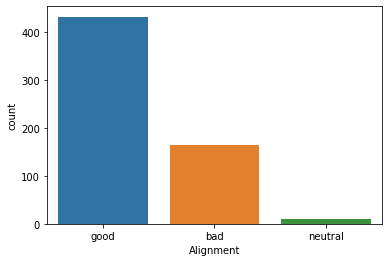

In [29]:
sns.countplot(x='Alignment', data=abengers_df)
plt.show()

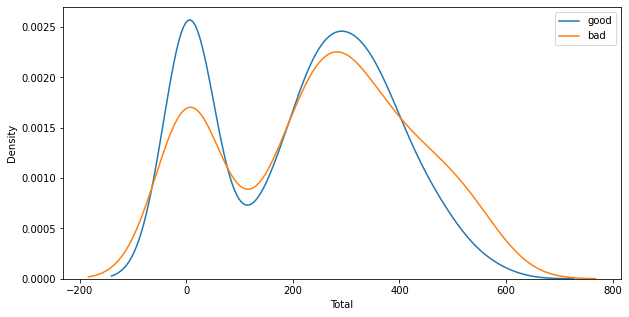

In [31]:
#

fig, ax = plt.subplots(1,1,figsize=(10, 5))
sns.kdeplot(x=abengers_df[abengers_df.Alignment=='good']['Total'], ax=ax)
sns.kdeplot(x=abengers_df[abengers_df.Alignment=='bad']['Total'], ax=ax)

plt.legend(['good','bad'])

plt.show()

c:\users\jys96\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jys96\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


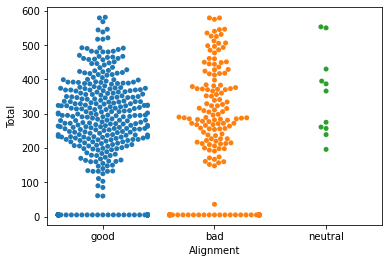

In [35]:
s = sns.swarmplot(x='Alignment',y='Total',data=abengers_df)
plt.show()